# K nearest neighbor Classifier

 ## About Algorithm            

### What is K-Nearest Neighbour algorithm?
1.  KNN algorithm is a supervised , and lazy classification technique. 
2. In normal term, if person is 30 people assume that the anyone who is 30 is married just because most of the people who are 30 are married.
3.  It calculate the euclidean distance for the input data which needs to be classified and the data which is used to train the model.
4.  Once the euclidean distance is calculated, it consider the K number of nearest neighbour and classifies the given input to the most repeated group in the list.
5. Identifying the K is critical.

### When to use KNN?
1. When dataset is small
2. When classification is required

### Pros
1. Easy to implement and  understand
2. Good results with small dataset

### Cons
1. Computation cost is high(which is n^2)
2. Not suitable for large dataset


## About Notebook

### Problem Statement
To Classify whether the benign or malignant based on 10 attributes which described the 

### Daset
1. Wisconsin Breast Cancer Database (January 8, 1991) with 10 attributes and 699 data points
2. Attributes
    1. Sample code number  (id name)
    2. Clump Thickness ()
    3. Uniformity of the cell Size ()
    4. Uniformity of the cell shape ()
    5. Marginal Adhesion ()
    6. Single Epithelial Cell Size ()
    7. Bare Nuclei ()
    8. Bland Chromatin ()
    9. Normal Nucleoli ()
    10. Mitoses ()
    11. Class ()


In [59]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
url = 'https://raw.githubusercontent.com/iamchiragshekars/Machine-Learning/master/Classification/breast-cancer-wisconsin.csv'
dataset = pa.read_csv(url, error_bad_lines=False)

In [61]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.2 KB


In [63]:
dataset = dataset.groupby(dataset.columns, axis = 1).transform(lambda x: x.fillna(0))
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].replace(0,dataset['Bare Nuclei'].mean())

dataset.iloc[:,10].replace(2, 0,inplace=True)
dataset.iloc[:,10].replace(4, 1,inplace=True)

dataset = dataset.drop('Sample code number', axis=1);

In [64]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.542799,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601872,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


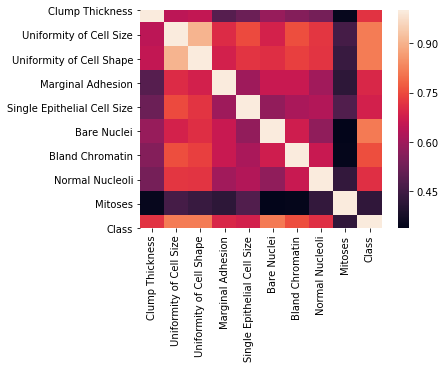

In [65]:
sns.heatmap(dataset.corr(), vmax=1, square=True)

In [66]:
dataset.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.587488,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686915,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709660,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665225,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.581440,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.587488,0.686915,0.709660,0.665225,0.581440,1.000000,0.675958,0.577378,0.338916,0.816284
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.675958,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.577378,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338916,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.816284,0.756616,0.712244,0.423170,1.000000


In [67]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,y_train)
    
    train_accuracy[i] = knn.score(X_train,y_train)
    
    test_accuracy[i] = knn.score(X_test,y_test)
    

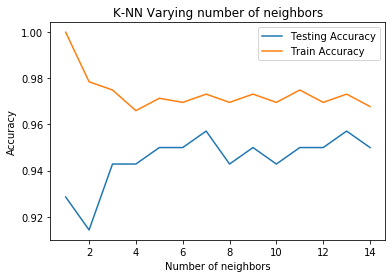

In [70]:
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Train Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [71]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[89  0]
 [ 7 44]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        89
           1       1.00      0.86      0.93        51

    accuracy                           0.95       140
   macro avg       0.96      0.93      0.94       140
weighted avg       0.95      0.95      0.95       140

